#IMPORTING MODULES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import xgboost as xgb
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

#EXPLORING

In [2]:
df=pd.read_csv('train-chennai-sale.csv')

In [3]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [4]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [6]:
df.shape

(7109, 22)

#CLEANING THE DATA

##AREA

In [7]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [8]:
(df['AREA']=='Anna Nagar').sum()

783

In [9]:
(df['AREA']=='Karapakkam').sum()

1363

In [10]:
df=df.replace('Ana Nagar','Anna Nagar')
df=df.replace('Ann Nagar','Anna Nagar')
df=df.replace('Karapakam','Karapakkam')
df=df.replace('Velchery','Velachery')
df=df.replace('Chrmpet','Chormpet')
df=df.replace('Chrompt','Chormpet')
df=df.replace('Chrompet','Chormpet')
df=df.replace('TNagar','T Nagar')
df=df.replace('KKNagar','KK Nagar')
df=df.replace('Adyr','Adyar')

* replacing spelling errors.

In [11]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chormpet',
       'KK Nagar', 'T Nagar'], dtype=object)

##INT_SQFT

In [12]:
df['INT_SQFT'].size

7109

In [13]:
df['INT_SQFT'].dtype

dtype('int64')

## DATE_SALE

In [14]:
df['DATE_SALE'].dtype

dtype('O')

In [15]:
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])

* changing object to date format

In [16]:
df['DATE_SALE'].dtype

dtype('<M8[ns]')

In [17]:
df['DATE_SALE']=df['DATE_SALE'].dt.year

##DIST_MAINROAD 

In [18]:
df['DIST_MAINROAD'].isnull().sum()

0

In [19]:
df['DIST_MAINROAD'].describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

## N_BEDROOM

In [20]:
df['N_BEDROOM'].isnull().sum()

1

In [21]:
df.loc[df['N_BEDROOM'].isnull()]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
4060,P01066,Anna Nagar,1556,2013,181,NaN,1.0,4,Partiall,No,...,NoSewr,No Access,RM,4.8,2.7,2.0,3.155,313136,107978,10797790


In [22]:
df['N_BEDROOM']=df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0])

* filling the null values

In [23]:
df['N_BEDROOM']=df['N_BEDROOM'].astype('int64')

In [24]:
df['N_BEDROOM'].isnull().sum()

0

In [25]:
df.iloc[[4060]]

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
4060,P01066,Anna Nagar,1556,2013,181,1,1.0,4,Partiall,No,...,NoSewr,No Access,RM,4.8,2.7,2.0,3.155,313136,107978,10797790


## N_BATHROOM 

In [26]:
df['N_BATHROOM'].isnull().sum()

5

In [27]:
df['N_BATHROOM']=df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0])

* filling the null values

In [28]:
df['N_BATHROOM'].isnull().sum()

0

In [29]:
df['N_BATHROOM']=df['N_BATHROOM'].astype('int64')

##N_ROOM

In [30]:
df['N_ROOM'].isnull().sum()

0

In [31]:
df['N_ROOM'].dtype

dtype('int64')

##SALE_COND

In [32]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [33]:
df['SALE_COND']=df['SALE_COND'].replace('Ab Normal','AbNormal')
df['SALE_COND']=df['SALE_COND'].replace('PartiaLl','Partial')
df['SALE_COND']=df['SALE_COND'].replace('Partiall','Partial')
df['SALE_COND']=df['SALE_COND'].replace('Adj Land','AdjLand')

In [34]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

##PARK_FACIL

In [35]:
df['PARK_FACIL'].isnull().sum()

0

In [36]:
df['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [37]:
df['PARK_FACIL']=df['PARK_FACIL'].replace('Noo','No')

In [38]:
df['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

##  DATE_BUILD

In [39]:
df['DATE_BUILD'].dtype

dtype('O')

In [40]:
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])

In [41]:
df['DATE_BUILD'].dtype

dtype('<M8[ns]')

In [42]:
df['DATE_BUILD'].isnull().sum()

0

In [43]:
df['DATE_BUILD']=df['DATE_BUILD'].dt.year

##Age
  * Adding a new column "AGE" to calculate age of the building

In [44]:
df['AGE']=df['DATE_SALE']-df['DATE_BUILD']

In [45]:
df['AGE']

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: AGE, Length: 7109, dtype: int64

##BUILDTYPE

In [46]:
df['BUILDTYPE'].isnull().sum()

0

In [47]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [48]:
df['BUILDTYPE']=df['BUILDTYPE'].replace('Comercial','Commercial')
df['BUILDTYPE']=df['BUILDTYPE'].replace('Other','Others')

*  correcting spelling mistakes

In [49]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

##UTILITY_AVAIL

In [50]:
df['UTILITY_AVAIL'].isnull().sum()

0

In [51]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [52]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].replace('All Pub','AllPub')
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].replace('NoSewr ','NoSewr')

* correcting spelling mistakes

In [53]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

##STREET

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   int64  
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   int64  
 6   N_BATHROOM     7109 non-null   int64  
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   int64  
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [55]:
df['STREET'].isnull().sum()

0

In [56]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [57]:
df['STREET']=df['STREET'].replace('NoAccess','No Access')
df['STREET']=df['STREET'].replace('Pavd','Paved')

In [58]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

##MZZONE
  * A-Agricultural land
  * C-Commercial land
  * I-Industrial land
  * RH-Residential Highdensity
  * RL-Residential Lowdensity
  * RM-Residential Mediumdensity

In [59]:
df['MZZONE'].isnull().sum()

0

In [60]:
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

##SALES_PRICE

In [61]:
df['SALES_PRICE'].isnull().sum()

0

In [62]:
df['SALES_PRICE'].dtype

dtype('int64')

##QS_ROOMS

In [63]:
df['QS_ROOMS'].isnull().sum()

0

##QS_BATHROOM

In [64]:
df['QS_BATHROOM'].isnull().sum()

0

In [65]:
df['QS_ROOMS']=df['QS_ROOMS'].astype('int64')

##QS_BEDROOM

In [66]:
df['QS_BEDROOM'].isnull().sum()

0

##QS_OVERALL

In [67]:
df['QS_OVERALL'].isnull().sum()

48

In [68]:
df['QS_OVERALL']=df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())

In [69]:
df['QS_OVERALL'].isnull().sum()

0

##REG_FEE,COMMIS
  *  both the registration fees and commission will be included only after the completion of sales
  * considering that the columns has been dropped 


In [70]:
df=df.drop(columns=['REG_FEE','COMMIS'])

In [71]:
df=df.drop(columns=['PRT_ID'])

In [72]:
df

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,2011,131,1,1,3,AbNormal,Yes,1967,Commercial,AllPub,Paved,A,4,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,2006,26,2,1,5,AbNormal,No,1995,Commercial,AllPub,Gravel,RH,4,4.2,2.5,3.765,21717770,11
2,Adyar,909,2012,70,1,1,3,AbNormal,Yes,1992,Commercial,ELO,Gravel,RL,4,3.8,2.2,3.090,13159200,20
3,Velachery,1855,2010,14,3,2,5,Family,No,1988,Others,NoSewr,Paved,I,4,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,2009,84,1,1,3,AbNormal,Yes,1979,Others,AllPub,Gravel,C,3,2.5,4.1,3.290,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,2011,51,1,1,2,AdjLand,No,1962,Others,ELO,No Access,RM,3,2.2,2.4,2.520,5353000,49
7105,Velachery,1897,2004,52,3,2,5,Family,Yes,1995,Others,NoSeWa,No Access,RH,3,4.5,3.3,3.920,10818480,9
7106,Velachery,1614,2006,152,2,1,4,Normal Sale,No,1978,House,NoSeWa,Gravel,I,4,4.2,2.9,3.840,8351410,28
7107,Karapakkam,787,2009,40,1,1,2,Partial,Yes,1977,Commercial,ELO,Paved,RL,4,3.8,4.1,4.160,8507000,32


##SALES_PRICE

In [73]:
df['QS_OVERALL'].isnull().sum()  

0

#EDA(Exploratory Data Analysis)

##vizualization

##Area 

In [74]:
area=df['AREA'].groupby(df['AREA']).count()

Text(0.5, 1.0, 'Area vs sales price')

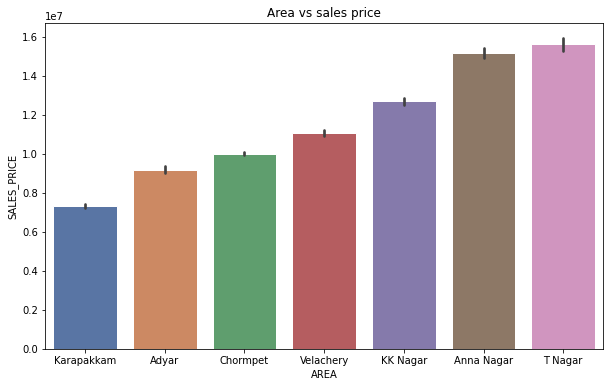

In [75]:
fig,ax=plt.subplots(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns.barplot(x=df['AREA'],y=df['SALES_PRICE'],ax=ax,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('Area vs sales price')

* area vizualiation shows a linear trend
* for some areas are having higher price than other areas

## square

Text(0.5, 1.0, 'INT_SQFT vs sales price')

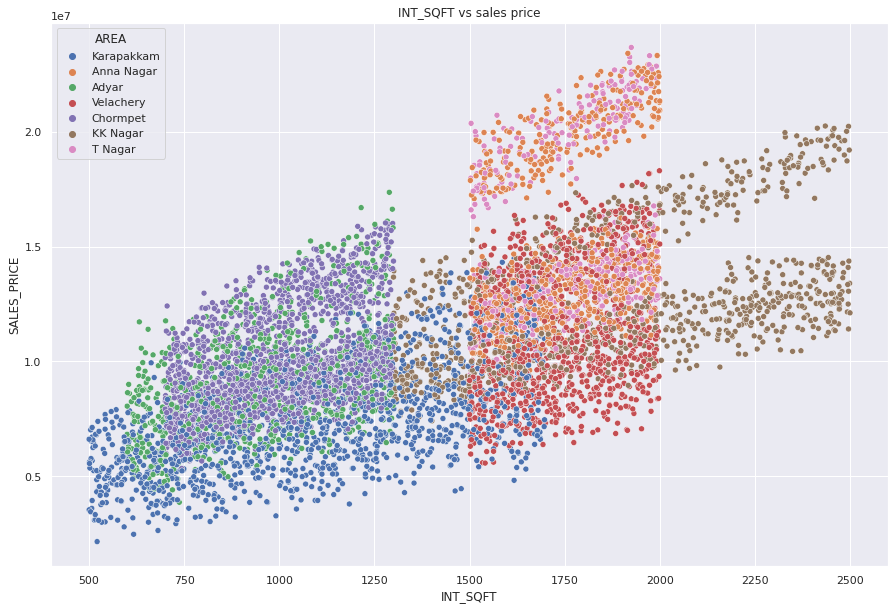

In [76]:
fig,ax=plt.subplots(figsize=(15,10))
sns.set_theme(style='darkgrid')
sns.scatterplot(x=df['INT_SQFT'],y=df['SALES_PRICE'],hue=df.AREA)
plt.title('INT_SQFT vs sales price')

* can see a linear trend over the data 
* increase in price of the square feet of the ground increases the price of the whole area

## Date sale

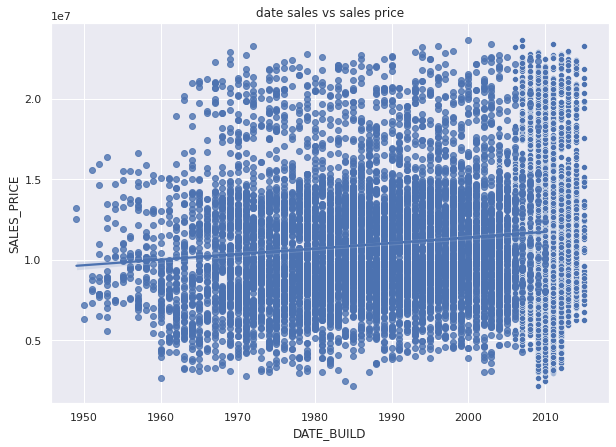

In [77]:
fig,ax=plt.subplots(figsize=(10,7))
sns.scatterplot(x=df['DATE_SALE'],y=df['SALES_PRICE'])
plt.title('date sales vs sales price')
sns.regplot(x=df['DATE_BUILD'],y=df['SALES_PRICE'])

* the date of sales doesn't show a linear trend

##Bed rooms

Text(0.5, 1.0, 'bed room vs sales price')

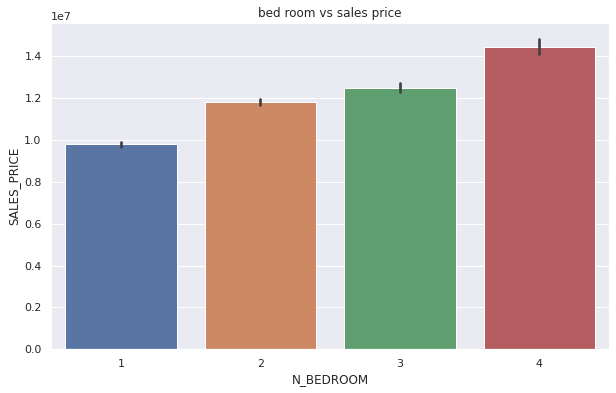

In [78]:
fig,ax=plt.subplots(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns.barplot(x=df['N_BEDROOM'],y=df['SALES_PRICE'],ax=ax,order=df.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM'])
plt.title('bed room vs sales price')

* can see a linear trend over the data as number bed room increases the price of the increases

##Bathroom

Text(0.5, 1.0, 'bathroom vs sales price')

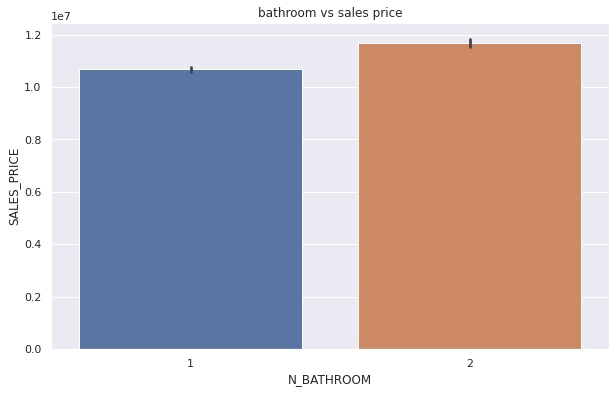

In [79]:
fig,ax=plt.subplots(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns.barplot(x=df['N_BATHROOM'],y=df['SALES_PRICE'],ax=ax,order=df.groupby('N_BATHROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BATHROOM'])
plt.title('bathroom vs sales price')

* seeing a linear trend in data

##room

Text(0.5, 1.0, 'Room  vs sales price')

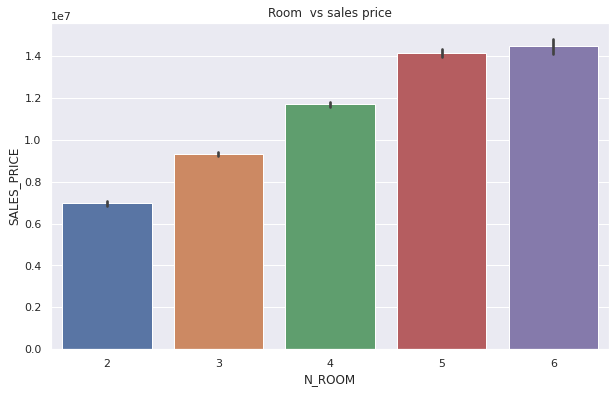

In [80]:
fig,ax=plt.subplots(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns.barplot(x=df['N_ROOM'],y=df['SALES_PRICE'],ax=ax,order=df.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM'])
plt.title('Room  vs sales price')

* can see a linear trend over the data as number bed room increases the price of the increases

##Sale condition

Text(0.5, 1.0, 'Sale condition vs sales price')

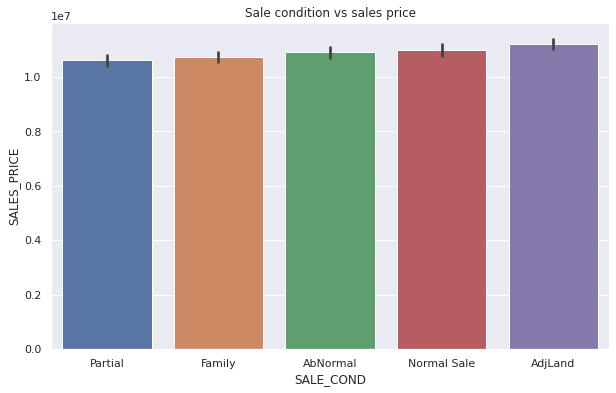

In [81]:
fig,ax=plt.subplots(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns.barplot(x=df['SALE_COND'],y=df['SALES_PRICE'],ax=ax,order=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title('Sale condition vs sales price')

* its shows the slight linear trend
* but it affects the price 

##parking facility

Text(0.5, 1.0, 'parking facility vs sales price')

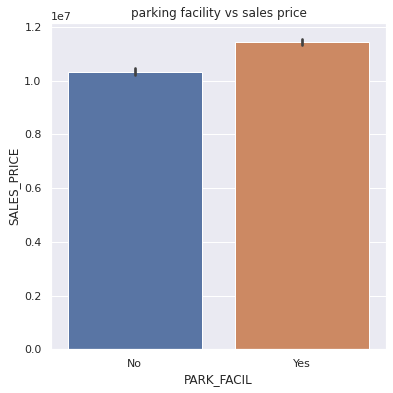

In [82]:
fig,ax=plt.subplots(figsize=(6,6))
sns.set_theme(style='darkgrid')
sns.barplot(x=df['PARK_FACIL'],y=df['SALES_PRICE'],ax=ax,order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.title('parking facility vs sales price')

* there are only two categorical value but the parking increases the price will also increase

##date builded

Text(0.5, 1.0, 'date build vs sales price')

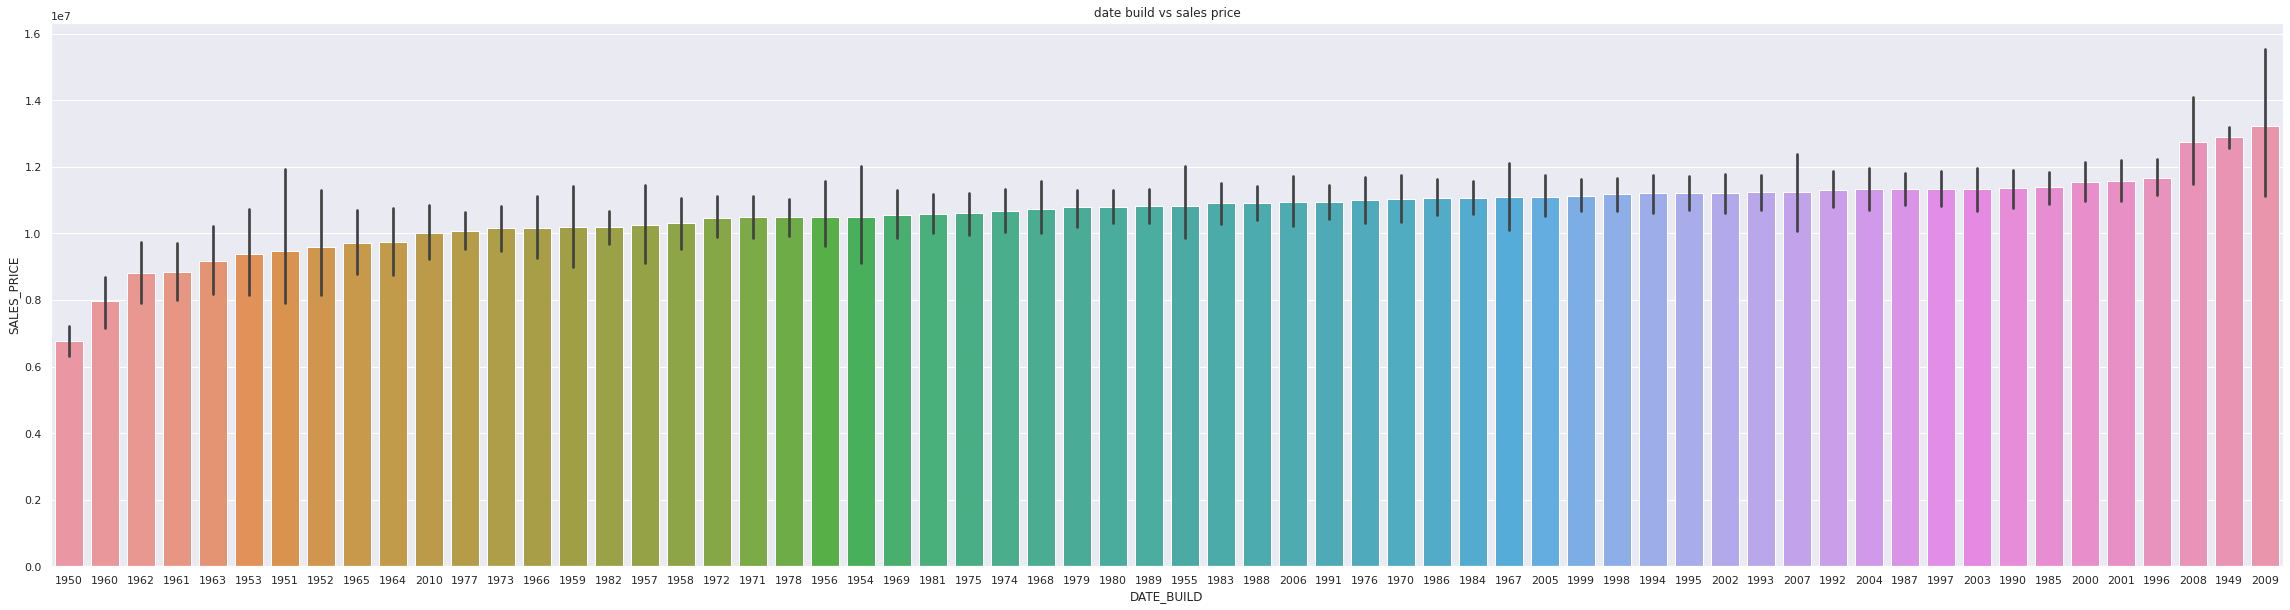

In [83]:
fig,ax=plt.subplots(figsize=(40,10))
sns.set_theme(style='darkgrid')
sns.barplot(x=df['DATE_BUILD'],y=df['SALES_PRICE'],ax=ax,order=df.groupby('DATE_BUILD')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['DATE_BUILD'])
plt.title('date build vs sales price')

Text(0.5, 1.0, 'date build vs sales price')

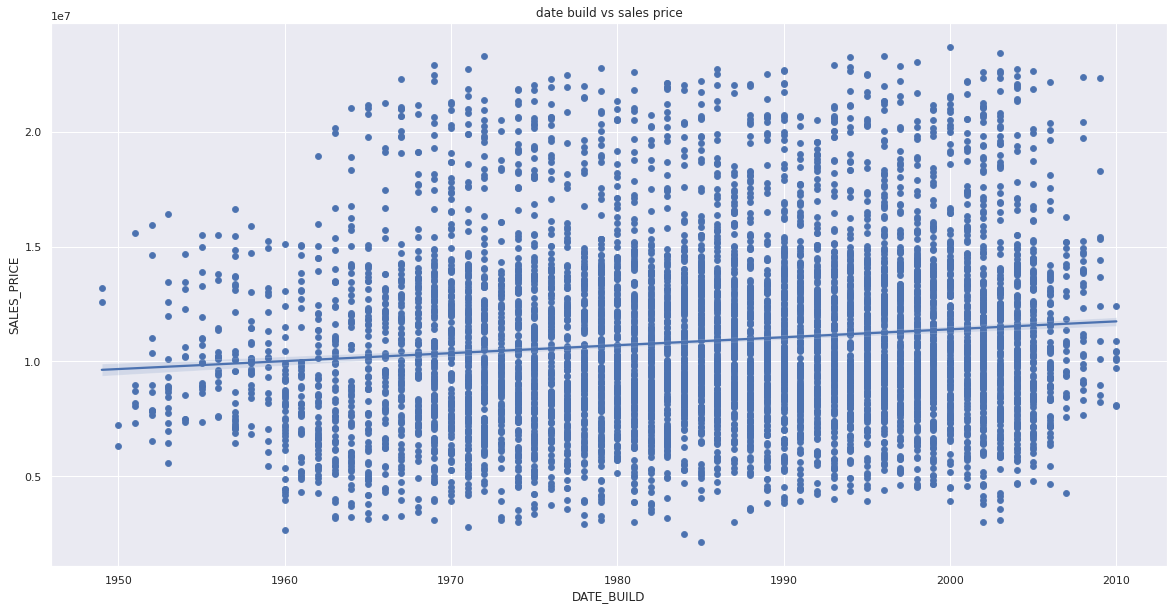

In [84]:
fig,ax=plt.subplots(figsize=(20,10))
sns.set_theme(style='darkgrid')
sns.scatterplot(x=df['DATE_BUILD'],y=df['SALES_PRICE'])
sns.regplot(x=df['DATE_BUILD'],y=df['SALES_PRICE'])
plt.title('date build vs sales price')

* even though the data build show a linear trend the age of the building plays a similare but give better understanding of the data

## build type

Text(0.5, 1.0, 'build type vs sales price')

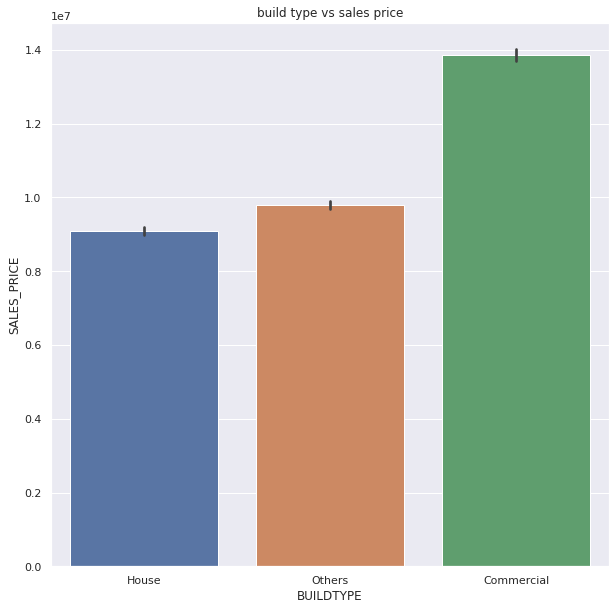

In [85]:
fig,ax=plt.subplots(figsize=(10,10))
sns.set_theme(style='darkgrid')
sns.barplot(x=df['BUILDTYPE'],y=df['SALES_PRICE'],ax=ax,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title('build type vs sales price')

* build type doesn't show a linear trend in the data

## utility availability

Text(0.5, 1.0, 'utility availability vs sales price')

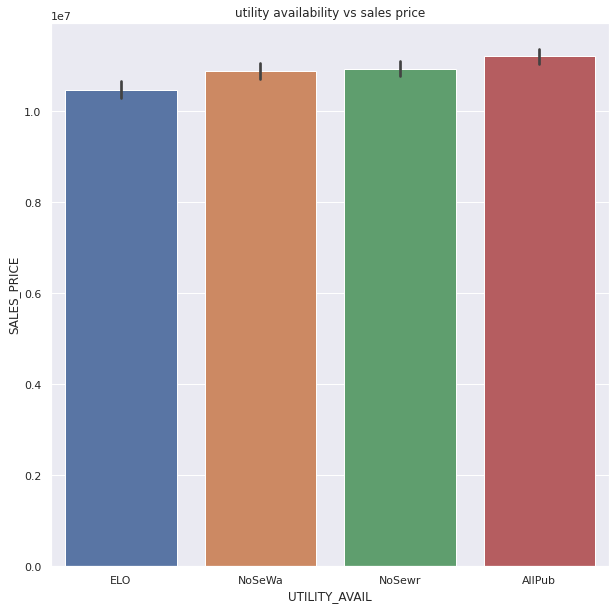

In [86]:
fig,ax=plt.subplots(figsize=(10,10))
sns.set_theme(style='darkgrid')
sns.barplot(x=df['UTILITY_AVAIL'],y=df['SALES_PRICE'],ax=ax,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('utility availability vs sales price')

* As utlity availbility shows a linear tread
* the price of the house which has all the utlities have higher price 

## Street type

Text(0.5, 1.0, 'build type vs sales price')

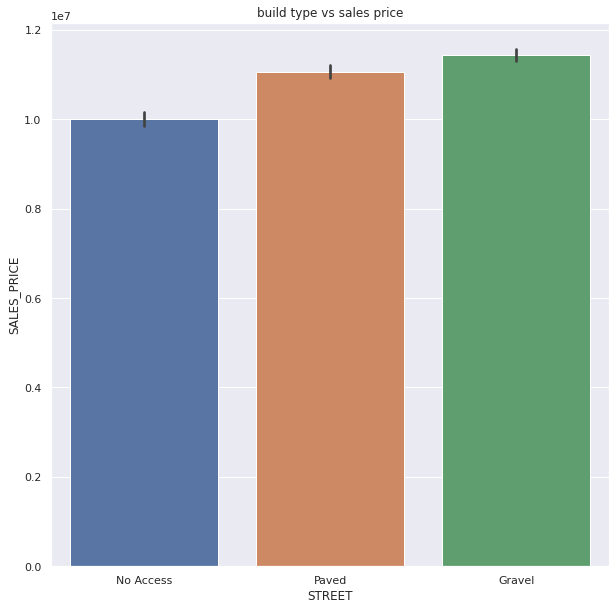

In [87]:
fig,ax=plt.subplots(figsize=(10,10))
sns.set_theme(style='darkgrid')
sns.barplot(x=df['STREET'],y=df['SALES_PRICE'],ax=ax,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title('build type vs sales price')

* Street show a linear trend in the data
* and it contributes to the price of the house

##Zone

Text(0.5, 1.0, 'Zone vs sales price')

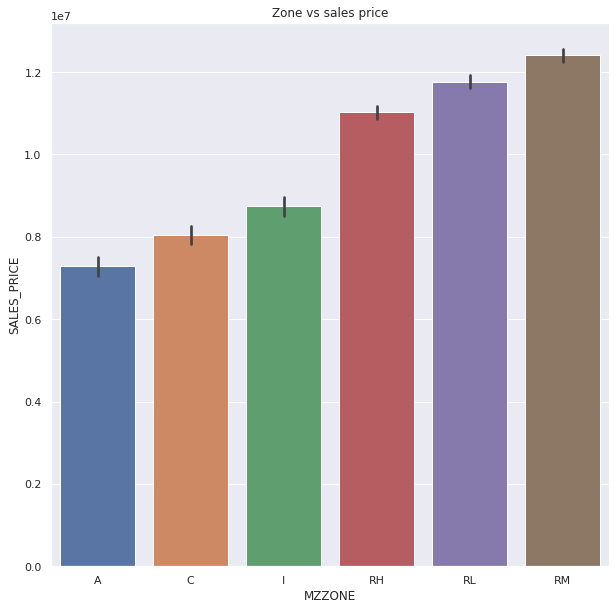

In [88]:
fig,ax=plt.subplots(figsize=(10,10))
sns.set_theme(style='darkgrid')
sns.barplot(x=df['MZZONE'],y=df['SALES_PRICE'],ax=ax,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.title('Zone vs sales price')

* can see a linear trend even though it is perfectly linear there is linear trend in the data

##QS_ROOMS

Text(0.5, 1.0, 'QS_ROOMS vs sales price')

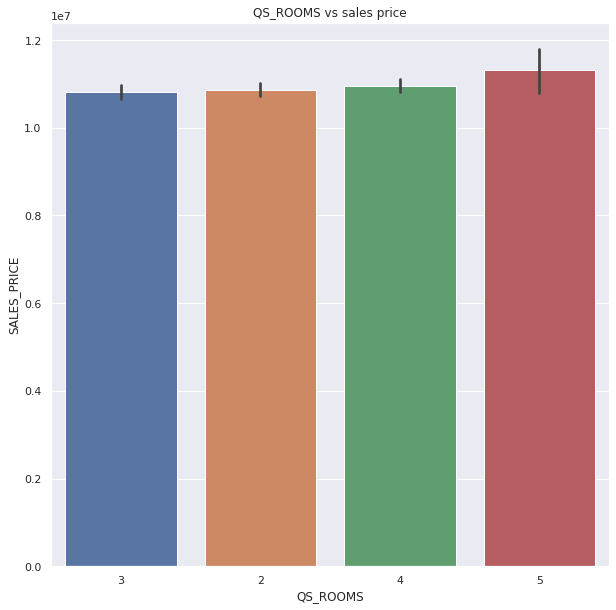

In [89]:
fig,ax=plt.subplots(figsize=(10,10))
sns.set_theme(style='darkgrid')
sns.barplot(x=df['QS_ROOMS'],y=df['SALES_PRICE'],ax=ax,order=df.groupby('QS_ROOMS')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['QS_ROOMS'])
plt.title('QS_ROOMS vs sales price')

Text(0.5, 1.0, 'QS_BEDROOM vs sales price')

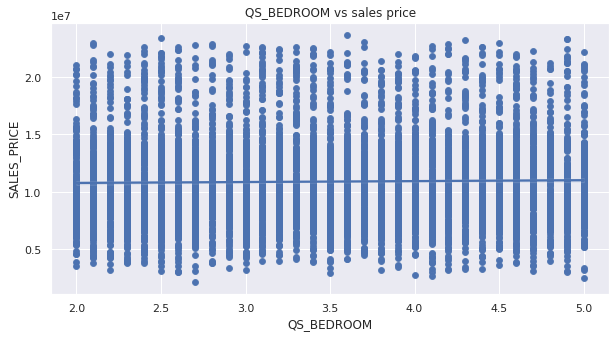

In [90]:
fig,ax=plt.subplots(figsize=(10,5))
sns.set_theme(style='darkgrid')
sns.scatterplot(x=df['QS_BEDROOM'],y=df['SALES_PRICE'])
sns.regplot(x=df['QS_BEDROOM'],y=df['SALES_PRICE'])
plt.title('QS_BEDROOM vs sales price')

* doesn't show a linear trend in the data

##QS_BATHROOM

Text(0.5, 1.0, 'QS_BATHROOM vs sales price')

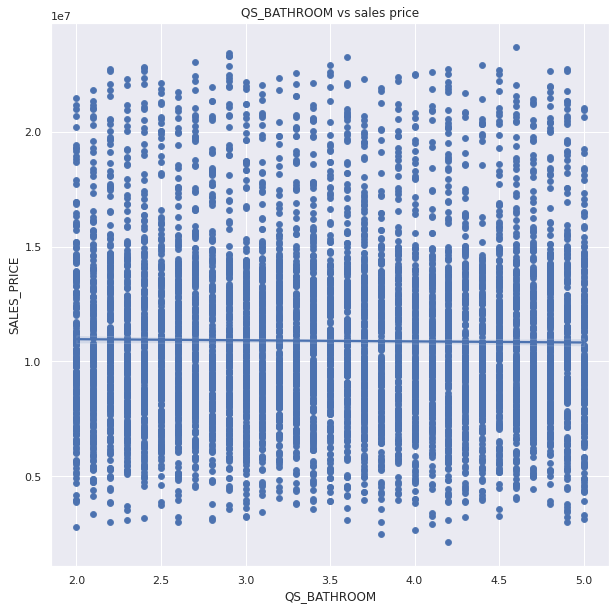

In [91]:
fig,ax=plt.subplots(figsize=(10,10))
sns.set_theme(style='darkgrid')
sns.scatterplot(x=df['QS_BATHROOM'],y=df['SALES_PRICE'])
sns.regplot(x=df['QS_BATHROOM'],y=df['SALES_PRICE'])
plt.title('QS_BATHROOM vs sales price')

* doesn't show a linear trend in the data

##QS_OVERALL

Text(0.5, 1.0, 'QS_OVERALL vs sales price')

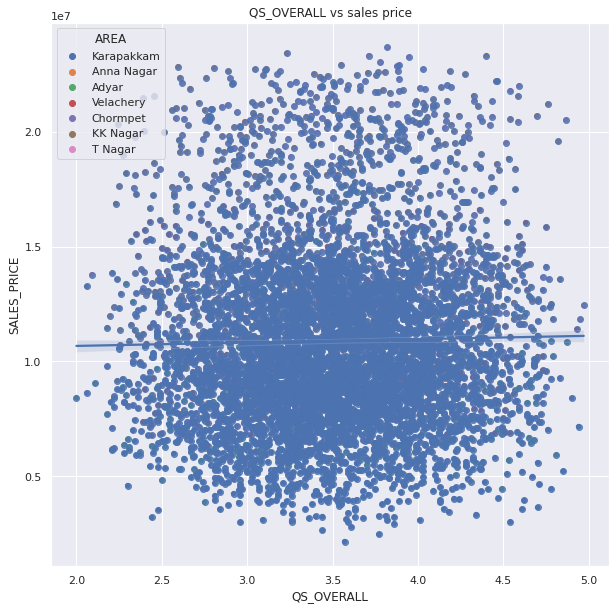

In [92]:
fig,ax=plt.subplots(figsize=(10,10))
sns.set_theme(style='darkgrid')
sns.scatterplot(x=df['QS_OVERALL'],y=df['SALES_PRICE'],hue=df['AREA'])
sns.regplot(x=df['QS_OVERALL'],y=df['SALES_PRICE'])
plt.title('QS_OVERALL vs sales price')

* show a linear trend in the data

##AGE

Text(0.5, 1.0, 'AGE vs sales price')

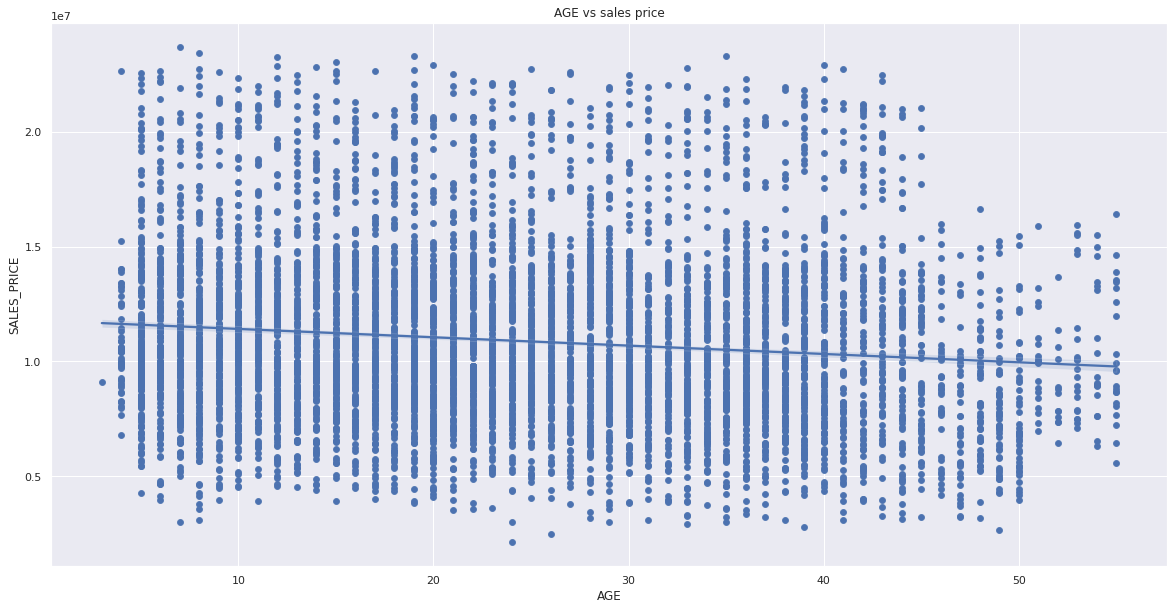

In [93]:
fig,ax=plt.subplots(figsize=(20,10))
sns.set_theme(style='darkgrid')
sns.scatterplot(x=df['AGE'],y=df['SALES_PRICE'])
sns.regplot(x=df['AGE'],y=df['SALES_PRICE'])
plt.title('AGE vs sales price')

* show a linear trend in the data
* as Age of the house increases price also increases

## distance to main road

Text(0.5, 1.0, 'QS_DIST_MAINROADBED vs sales price')

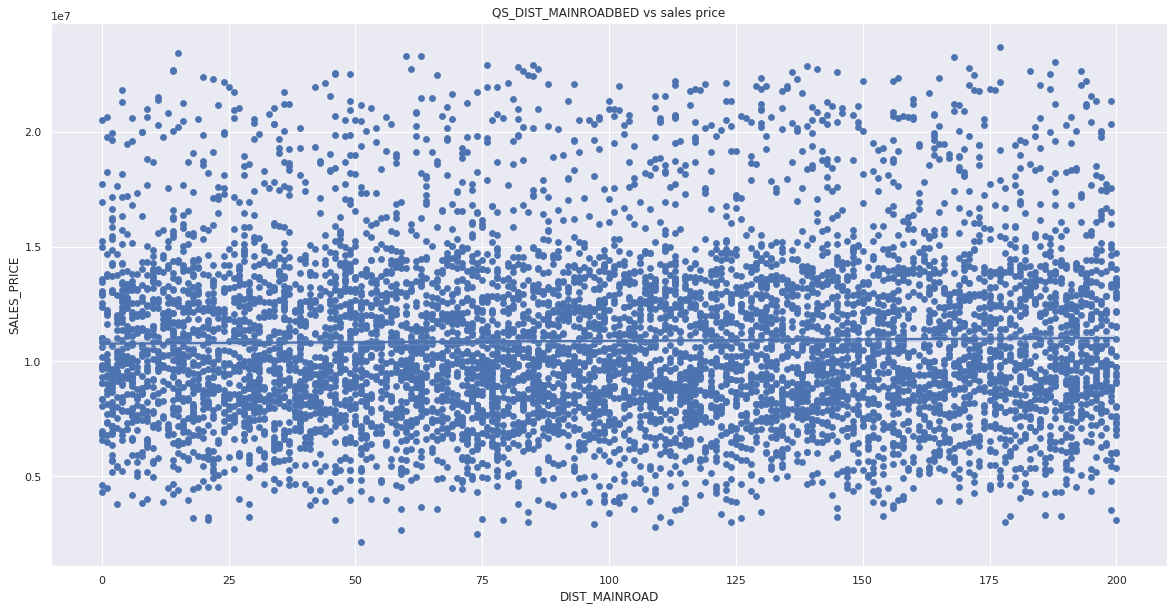

In [94]:
fig,ax=plt.subplots(figsize=(20,10))
sns.set_theme(style='darkgrid')
sns.scatterplot(x=df['DIST_MAINROAD'],y=df['SALES_PRICE'])
sns.regplot(x=df['DIST_MAINROAD'],y=df['SALES_PRICE'])
plt.title('QS_DIST_MAINROADBED vs sales price')

* doesn't show a linear trend in the data

#DROPING COLUMS

In [95]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'AGE'],
      dtype='object')

In [96]:
df=df.drop(columns=['DIST_MAINROAD','QS_BATHROOM', 'QS_BEDROOM','DATE_SALE','QS_ROOMS','QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL'])

#ENCODING

In [97]:
df2=df

* making a copy of the data

In [98]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'SALES_PRICE', 'AGE'],
      dtype='object')

##Area

In [99]:
df['AREA']=df['AREA'].map({'Karapakkam':1,'Adyar':2,'Chormpet':3,'Velachery':4,'KK Nagar':5,'Anna Nagar':6,'T Nagar':7})

In [100]:
df.AREA.unique().dtype

dtype('int64')

## Sale condition

In [101]:
df['SALE_COND']=df['SALE_COND'].map({'Partial':1,'Family':2,'AbNormal':3,'Normal Sale':4,'AdjLand':5})

## parking facility

In [102]:
df['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [103]:
df['PARK_FACIL']=df['PARK_FACIL'].map({'No':1,'Yes':2})

In [104]:
df['PARK_FACIL'].unique().dtype

dtype('int64')

##Build Type

In [105]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [106]:
one_hot=pd.get_dummies(df['BUILDTYPE']).astype(int)
df=df.join(one_hot)

In [107]:
df

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,Commercial,House,Others
0,1,1004,1,1,3,3,2,1967,Commercial,AllPub,Paved,A,7600000,44,1,0,0
1,6,1986,2,1,5,3,1,1995,Commercial,AllPub,Gravel,RH,21717770,11,1,0,0
2,2,909,1,1,3,3,2,1992,Commercial,ELO,Gravel,RL,13159200,20,1,0,0
3,4,1855,3,2,5,2,1,1988,Others,NoSewr,Paved,I,9630290,22,0,0,1
4,1,1226,1,1,3,3,2,1979,Others,AllPub,Gravel,C,7406250,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,1,1,2,5,1,1962,Others,ELO,No Access,RM,5353000,49,0,0,1
7105,4,1897,3,2,5,2,2,1995,Others,NoSeWa,No Access,RH,10818480,9,0,0,1
7106,4,1614,2,1,4,4,1,1978,House,NoSeWa,Gravel,I,8351410,28,0,1,0
7107,1,787,1,1,2,1,2,1977,Commercial,ELO,Paved,RL,8507000,32,1,0,0


In [108]:
df=df.drop(columns=['BUILDTYPE'])

##utility availability

In [109]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr', 'NoSeWa'], dtype=object)

In [110]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].map({'ELO':1,'NoSeWa':2,'NoSewr':3,'AllPub':4})

In [111]:
df['UTILITY_AVAIL'].dtype

dtype('int64')

##Street

In [112]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [113]:
df['STREET']=df['STREET'].map({'No Access':1,'Paved':2,'Gravel':3})

In [114]:
df['STREET'].unique().dtype

dtype('int64')

##Zone

In [115]:
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [116]:
df['MZZONE']=df['MZZONE'].map({'A':1,'C':2,'I':3,'RL':5,'RM':6,'RH':7})

In [117]:
df['MZZONE'].unique().dtype

dtype('int64')

In [118]:
df

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,Commercial,House,Others
0,1,1004,1,1,3,3,2,1967,4,2,1,7600000,44,1,0,0
1,6,1986,2,1,5,3,1,1995,4,3,7,21717770,11,1,0,0
2,2,909,1,1,3,3,2,1992,1,3,5,13159200,20,1,0,0
3,4,1855,3,2,5,2,1,1988,3,2,3,9630290,22,0,0,1
4,1,1226,1,1,3,3,2,1979,4,3,2,7406250,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,1,1,2,5,1,1962,1,1,6,5353000,49,0,0,1
7105,4,1897,3,2,5,2,2,1995,2,1,7,10818480,9,0,0,1
7106,4,1614,2,1,4,4,1,1978,2,3,3,8351410,28,0,1,0
7107,1,787,1,1,2,1,2,1977,1,2,5,8507000,32,1,0,0


In [119]:
df.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'DATE_BUILD', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'SALES_PRICE', 'AGE', 'Commercial', 'House', 'Others'],
      dtype='object')

# spliting the data

In [120]:
X=df[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
  'PARK_FACIL','UTILITY_AVAIL', 'DATE_BUILD', 'STREET', 'MZZONE',
        'AGE', 'Commercial', 'House','Others']]
y=df['SALES_PRICE']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#SCALING THE DATA

In [121]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

#MODEL

##linear regression

In [122]:
linea_reg=LinearRegression()
linea_reg.fit(X_train,y_train)
y_pred=linea_reg.predict(X_test)

In [123]:
pd.DataFrame({'actual value':y_test,'predicted vaule':y_pred})

,actual value,predicted vaule
1752,13217400,1.288442e+07
1492,7741945,6.457477e+06
1690,12014520,1.330834e+07
6770,21690890,1.895225e+07
3272,13039760,1.234851e+07
...,...,...
5321,8766600,8.468490e+06
3027,8350550,8.580631e+06
5658,7028960,6.367905e+06
5913,22401070,1.827521e+07


In [124]:
print('the R2 score of linear regresion : ',r2_score(y_test,y_pred))

the R2 score of linear regresion :  0.8928953533667878


##KNN

In [125]:
for k in range(1,20):
  X=X_train,y_train
  knn=KNeighborsRegressor(k)
  knn.fit(X_train,y_train)
  print("K : ", k, " Train Accuracy : ", knn.score(X_train,y_train), " cross Value Accuracy : ", np.mean(cross_val_score(knn,X_train,y_train, cv=2)))

K :  1  Train Accuracy :  1.0  cross Value Accuracy :  0.8908029313758815
K :  2  Train Accuracy :  0.9782074322103387  cross Value Accuracy :  0.914683691838138
K :  3  Train Accuracy :  0.9703284276598726  cross Value Accuracy :  0.9194255066371841
K :  4  Train Accuracy :  0.964894646920197  cross Value Accuracy :  0.9213488424778267
K :  5  Train Accuracy :  0.9614739410613644  cross Value Accuracy :  0.9219464008923499
K :  6  Train Accuracy :  0.958563364931974  cross Value Accuracy :  0.9200855691003353
K :  7  Train Accuracy :  0.955416112859389  cross Value Accuracy :  0.9184805862064501
K :  8  Train Accuracy :  0.9530296567730532  cross Value Accuracy :  0.9171210332215884
K :  9  Train Accuracy :  0.9505838730946735  cross Value Accuracy :  0.9153960883767117
K :  10  Train Accuracy :  0.9483144151799718  cross Value Accuracy :  0.9141566376950185
K :  11  Train Accuracy :  0.9461775036319805  cross Value Accuracy :  0.9120332597003231
K :  12  Train Accuracy :  0.944416323

* by doing hit and trial to find the **k score** the best score is **3** with training accuracy of **0.9697517370865706** 

In [126]:
for k in range(10,30):
  X=X_train,y_train
  knn=KNeighborsRegressor(3)
  knn.fit(X_train,y_train)
  print("K : ", 3, " Train Accuracy : ", knn.score(X_train,y_train), " cross Value Accuracy : ",k, np.mean(cross_val_score(knn,X_train,y_train, cv=k)))

K :  3  Train Accuracy :  0.9703284276598726  cross Value Accuracy :  10 0.9362922949458607
K :  3  Train Accuracy :  0.9703284276598726  cross Value Accuracy :  11 0.935994745600135
K :  3  Train Accuracy :  0.9703284276598726  cross Value Accuracy :  12 0.9360899629968288
K :  3  Train Accuracy :  0.9703284276598726  cross Value Accuracy :  13 0.9364460574381402
K :  3  Train Accuracy :  0.9703284276598726  cross Value Accuracy :  14 0.9364144444429702
K :  3  Train Accuracy :  0.9703284276598726  cross Value Accuracy :  15 0.9368024624107233
K :  3  Train Accuracy :  0.9703284276598726  cross Value Accuracy :  16 0.9364586707932503
K :  3  Train Accuracy :  0.9703284276598726  cross Value Accuracy :  17 0.9363483814534552
K :  3  Train Accuracy :  0.9703284276598726  cross Value Accuracy :  18 0.9363133581191528
K :  3  Train Accuracy :  0.9703284276598726  cross Value Accuracy :  19 0.9367811157697351
K :  3  Train Accuracy :  0.9703284276598726  cross Value Accuracy :  20 0.936713

* by doing hit and trial to find the **cross Value score** the best score is **21** with  cross Value Accuracy of **0.9362788206441198**


In [127]:
X=X_train,y_train
knn=KNeighborsRegressor(21)
knn.fit(X_train,y_train)
print("K : ", 3, " Train Accuracy : ", knn.score(X_train,y_train), " cross Value Accuracy : ",k, np.mean(cross_val_score(knn,X_train,y_train, cv=21)))

K :  3  Train Accuracy :  0.9303318740045178  cross Value Accuracy :  29 0.9198412639038169


In [128]:
y_pred=knn.predict(X_test)

In [129]:
pd.DataFrame({'actual value':y_test,'predicted vaule':y_pred})

,actual value,predicted vaule
1752,13217400,1.218205e+07
1492,7741945,6.305689e+06
1690,12014520,1.196814e+07
6770,21690890,1.874398e+07
3272,13039760,1.223881e+07
...,...,...
5321,8766600,9.144558e+06
3027,8350550,8.282483e+06
5658,7028960,6.590393e+06
5913,22401070,2.006756e+07


In [130]:
print('the R2 score of KNN Regression : ',r2_score(y_test,y_pred))

the R2 score of KNN Regression :  0.9115599795595045


## Decision Tree

In [131]:
for k in range(1,20):
  X=X_train,y_train
  dt=DecisionTreeRegressor(max_depth=k)
  dt.fit(X_train, y_train)
  print("K : ", k, " Train Accuracy : ",dt.score(X_train,y_train), " cross Value Accuracy : ", np.mean(cross_val_score(knn,X_train,y_train, cv=2)))

K :  1  Train Accuracy :  0.3594627426882798  cross Value Accuracy :  0.8970106299923823
K :  2  Train Accuracy :  0.6833685120190176  cross Value Accuracy :  0.8970106299923823
K :  3  Train Accuracy :  0.8015571841660234  cross Value Accuracy :  0.8970106299923823
K :  4  Train Accuracy :  0.8854837269557997  cross Value Accuracy :  0.8970106299923823
K :  5  Train Accuracy :  0.9216369623480964  cross Value Accuracy :  0.8970106299923823
K :  6  Train Accuracy :  0.9414669688963315  cross Value Accuracy :  0.8970106299923823
K :  7  Train Accuracy :  0.9571903898771699  cross Value Accuracy :  0.8970106299923823
K :  8  Train Accuracy :  0.9709267598396746  cross Value Accuracy :  0.8970106299923823
K :  9  Train Accuracy :  0.9812963627896358  cross Value Accuracy :  0.8970106299923823
K :  10  Train Accuracy :  0.9887205591823662  cross Value Accuracy :  0.8970106299923823
K :  11  Train Accuracy :  0.993722385156883  cross Value Accuracy :  0.8970106299923823
K :  12  Train Accur

In [132]:
for k in range(15,40):
  X=X_train,y_train
  dt=DecisionTreeRegressor(max_depth=8)
  dt.fit(X_train, y_train)
  print("K : ",8, " Train Accuracy : ",dt.score(X_train,y_train), " cross Value Accuracy : ",k, np.mean(cross_val_score(knn,X_train,y_train, cv=k)))

K :  8  Train Accuracy :  0.9709267598396746  cross Value Accuracy :  15 0.9188218899322886
K :  8  Train Accuracy :  0.9709267598396746  cross Value Accuracy :  16 0.919263604817066
K :  8  Train Accuracy :  0.9709267598396746  cross Value Accuracy :  17 0.919343298483228
K :  8  Train Accuracy :  0.9709267598396746  cross Value Accuracy :  18 0.9196197611095742
K :  8  Train Accuracy :  0.9709267598396746  cross Value Accuracy :  19 0.9194914313187014
K :  8  Train Accuracy :  0.9709267598396746  cross Value Accuracy :  20 0.9194012785557915
K :  8  Train Accuracy :  0.9709267598396746  cross Value Accuracy :  21 0.9198412639038169
K :  8  Train Accuracy :  0.9709267598396746  cross Value Accuracy :  22 0.9198347513141886
K :  8  Train Accuracy :  0.9709267598396746  cross Value Accuracy :  23 0.9198721421685832
K :  8  Train Accuracy :  0.9709267598396746  cross Value Accuracy :  24 0.9197376298834352
K :  8  Train Accuracy :  0.9709267598396746  cross Value Accuracy :  25 0.9198930

cross Value Accuracy :  21 with 0.9362788206441198

In [133]:
dt=DecisionTreeRegressor(max_depth=21)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=21)

In [134]:
y_pred=dt.predict(X_test)

In [135]:
pd.DataFrame({'actual value':y_test,'predicted vaule':y_pred})

,actual value,predicted vaule
1752,13217400,13426800.0
1492,7741945,8334330.0
1690,12014520,12543380.0
6770,21690890,22852890.0
3272,13039760,13774320.0
...,...,...
5321,8766600,9494835.0
3027,8350550,8419850.0
5658,7028960,6285850.0
5913,22401070,22633000.0


In [136]:
print('the R2 score of Decision tree Regression : ',r2_score(y_test,y_pred))

the R2 score of Decision tree Regression :  0.9705420959662258


##XGBOOST

In [137]:
for i in [0.1,0.5,0.9,1,1.1,1.3,1.5,1.8,2]:
    xg=xgb.XGBRegressor(learning_rate=i,n_estimators=100,verbosity=0)
    xg.fit(X_train,y_train)
    y_pred=xg.predict(X_test)
    print('the R2 score of Decision tree Regression : ',i," ",r2_score(y_test,y_pred))

the R2 score of Decision tree Regression :  0.1   0.9903930702151734
the R2 score of Decision tree Regression :  0.5   0.9969286634848662
the R2 score of Decision tree Regression :  0.9   0.9961819697881572
the R2 score of Decision tree Regression :  1   0.9960870661754874
the R2 score of Decision tree Regression :  1.1   0.9956244846806722
the R2 score of Decision tree Regression :  1.3   0.9943649237543016
the R2 score of Decision tree Regression :  1.5   0.9800014286187158
the R2 score of Decision tree Regression :  1.8   0.9545093881797176
the R2 score of Decision tree Regression :  2   -4.5272182932873735


In [138]:
xg=xgb.XGBRegressor(learning_rate=1.1,n_estimators=100,verbosity=0)
xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)

In [139]:
pd.DataFrame({'actual value':y_test,'predicted vaule':y_pred})

,actual value,predicted vaule
1752,13217400,13229430.0
1492,7741945,7460874.0
1690,12014520,12159906.0
6770,21690890,21802662.0
3272,13039760,13109752.0
...,...,...
5321,8766600,8728120.0
3027,8350550,8355910.0
5658,7028960,6748911.0
5913,22401070,22733046.0


In [140]:
print('the R2 score of Decision tree Regression : ',r2_score(y_test,y_pred))

the R2 score of Decision tree Regression :  0.9956244846806722


#conlusion:
  *  Xgboost gives the highest R2 score
  *  followed by decision tree,KNN and linear regression